In [13]:
import xarray as xr

In [14]:
a = xr.open_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Amon/ta/gn/latest/ta_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_195001-201412.nc')
a

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, plev: 19, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    plev_bnds  (plev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-21T06:04:10Z
    ...                     ...
    variable_id:            ta
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/8dd1b9c7-4d88-4891-9a52-1f964b0140d5
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [15]:
da = a['ta']
da

<xarray.DataArray 'ta' (time: 780, plev: 19, lat: 144, lon: 192)>
[409743360 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    standard_name:  air_temperature
    long_name:      Air Temperature
    comment:        Air Temperature
    units:          K
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2019-11-21T06:04:08Z altered by CMOR: replaced missing va...

In [16]:
b = xr.open_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/fx/sftlf/gn/latest/sftlf_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc')
b

<xarray.Dataset>
Dimensions:   (lat: 145, bnds: 2, lon: 192)
Coordinates:
  * lat       (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    sftlf     (lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T17:53:23Z
    ...                     ...
    tracking_id:            hdl:21.14100/df560bac-0f00-461e-8e3c-640b17bfacfc
    variable_id:            sftlf
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [17]:
mask = b['sftlf']
mask

<xarray.DataArray 'sftlf' (lat: 145, lon: 192)>
[27840 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:   land_area_fraction
    long_name:       Percentage of the grid  cell occupied by land (including...
    comment:         Percentage of horizontal area occupied by land.
    units:           %
    original_units:  1
    history:         2019-11-15T17:53:20Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean
    cell_measures:   area: areacella

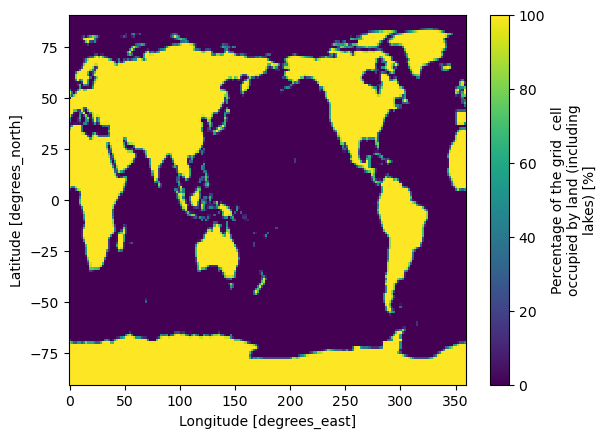

In [18]:
mask.plot()

In [19]:
mask = (mask/100 - 1)*-1

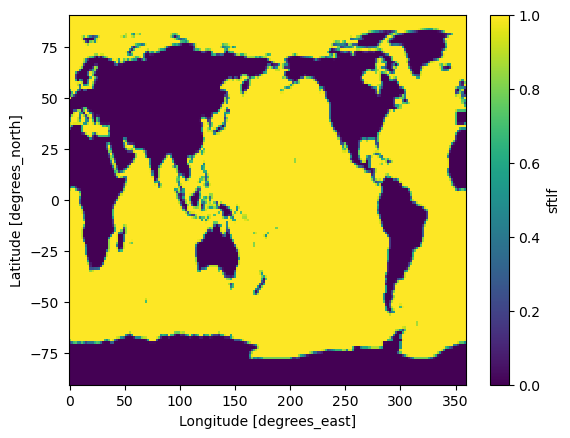

In [20]:
mask.plot()

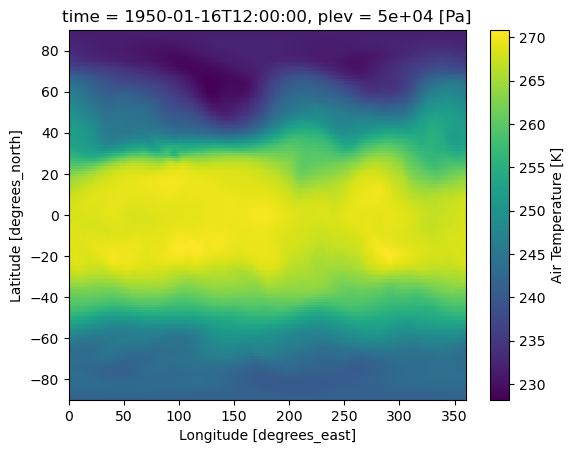

In [21]:
da1 = da.sel(plev = slice(600e2, 450e2)).isel(time=0)
da1.plot()

In [22]:
mask_interp = mask.interp(lat=da['lat'])
mask_interp['lon'] = mask_interp['lon'] + 0.9375

In [23]:
da_masked = da1 * mask_interp

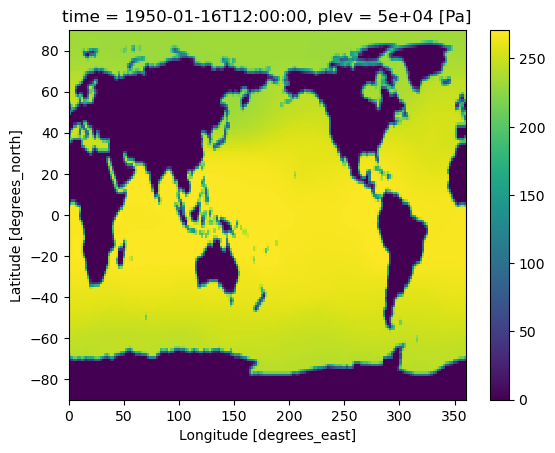

In [24]:
da_masked.plot()